# SMYLE biogeochemistry figure

In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr 
import numpy as np  
import cftime
import copy
import scipy.stats
from scipy import signal
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

from SMYLEutils import calendar_utils as cal
from SMYLEutils import stat_utils as stat
from SMYLEutils import mapplot_utils as maps
from SMYLEutils import colorbar_utils as cbars
from SMYLEutils import io_utils as io

### Get skill (ACC) files for:

• NPP (produced in SMYLE-analysis/notebooks/SMYLE_oceanNPP.ipynb)\
• Carbon export (produced in SMYLE-analysis/notebooks/SMYLE_C-export.ipynb)\
• Zooplankton carbon (produced in SMYLE-analysis/notebooks/SMYLE_zooC.ipynb)

In [2]:
file = '/glade/scratch/kristenk/SMYLE_paper/smyle05_NPP_skill_linear-detrend.nc'
ds_smyle05_NPP = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle02_NPP_skill_linear-detrend.nc'
ds_smyle02_NPP = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle08_NPP_skill_linear-detrend.nc'
ds_smyle08_NPP = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle11_NPP_skill_linear-detrend.nc'
ds_smyle11_NPP = xr.open_dataset(file)

In [3]:
file = '/glade/scratch/kristenk/SMYLE_paper/smyle05_Cexport_skill_linear-detrend.nc'
ds_smyle05_Cexport = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle02_Cexport_skill_linear-detrend.nc'
ds_smyle02_Cexport = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle08_Cexport_skill_linear-detrend.nc'
ds_smyle08_Cexport = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle11_Cexport_skill_linear-detrend.nc'
ds_smyle11_Cexport = xr.open_dataset(file)

In [4]:
file = '/glade/scratch/kristenk/SMYLE_paper/smyle05_zooC_skill_linear-detrend.nc'
ds_smyle05_zooC = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle02_zooC_skill_linear-detrend.nc'
ds_smyle02_zooC = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle08_zooC_skill_linear-detrend.nc'
ds_smyle08_zooC = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle11_zooC_skill_linear-detrend.nc'
ds_smyle11_zooC = xr.open_dataset(file)

### Now get ACC for CA current and SE US continental shelf LMEs (produced in the same notebooks as listed above)

In [5]:
####### NPP
### CA current
file = '/glade/scratch/kristenk/SMYLE_paper/smyle05_NPP_skill_linear-detrend_lme3.nc'
ds_smyle05_NPP_lme3 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle02_NPP_skill_linear-detrend_lme3.nc'
ds_smyle02_NPP_lme3 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle08_NPP_skill_linear-detrend_lme3.nc'
ds_smyle08_NPP_lme3 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle11_NPP_skill_linear-detrend_lme3.nc'
ds_smyle11_NPP_lme3 = xr.open_dataset(file)

### SE US continental shelf
file = '/glade/scratch/kristenk/SMYLE_paper/smyle05_NPP_skill_linear-detrend_lme6.nc'
ds_smyle05_NPP_lme6 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle02_NPP_skill_linear-detrend_lme6.nc'
ds_smyle02_NPP_lme6 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle08_NPP_skill_linear-detrend_lme6.nc'
ds_smyle08_NPP_lme6 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle11_NPP_skill_linear-detrend_lme6.nc'
ds_smyle11_NPP_lme6 = xr.open_dataset(file)

########## C export
### CA current
file = '/glade/scratch/kristenk/SMYLE_paper/smyle05_Cexport_skill_linear-detrend_lme3.nc'
ds_smyle05_Cexport_lme3 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle02_Cexport_skill_linear-detrend_lme3.nc'
ds_smyle02_Cexport_lme3 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle08_Cexport_skill_linear-detrend_lme3.nc'
ds_smyle08_Cexport_lme3 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle11_Cexport_skill_linear-detrend_lme3.nc'
ds_smyle11_Cexport_lme3 = xr.open_dataset(file)

### SE US continental shelf
file = '/glade/scratch/kristenk/SMYLE_paper/smyle05_Cexport_skill_linear-detrend_lme6.nc'
ds_smyle05_Cexport_lme6 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle02_Cexport_skill_linear-detrend_lme6.nc'
ds_smyle02_Cexport_lme6 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle08_Cexport_skill_linear-detrend_lme6.nc'
ds_smyle08_Cexport_lme6 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle11_Cexport_skill_linear-detrend_lme6.nc'
ds_smyle11_Cexport_lme6 = xr.open_dataset(file)

########## zooC
### CA current
file = '/glade/scratch/kristenk/SMYLE_paper/smyle05_zooC_skill_linear-detrend_lme3.nc'
ds_smyle05_zooC_lme3 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle02_zooC_skill_linear-detrend_lme3.nc'
ds_smyle02_zooC_lme3 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle08_zooC_skill_linear-detrend_lme3.nc'
ds_smyle08_zooC_lme3 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle11_zooC_skill_linear-detrend_lme3.nc'
ds_smyle11_zooC_lme3 = xr.open_dataset(file)

### SE US continental shelf
file = '/glade/scratch/kristenk/SMYLE_paper/smyle05_zooC_skill_linear-detrend_lme6.nc'
ds_smyle05_zooC_lme6 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle02_zooC_skill_linear-detrend_lme6.nc'
ds_smyle02_zooC_lme6 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle08_zooC_skill_linear-detrend_lme6.nc'
ds_smyle08_zooC_lme6 = xr.open_dataset(file)

file = '/glade/scratch/kristenk/SMYLE_paper/smyle11_zooC_skill_linear-detrend_lme6.nc'
ds_smyle11_zooC_lme6 = xr.open_dataset(file)

### Make some maps

In [6]:
import shapefile as shp

In [7]:
import warnings
warnings.filterwarnings("ignore")

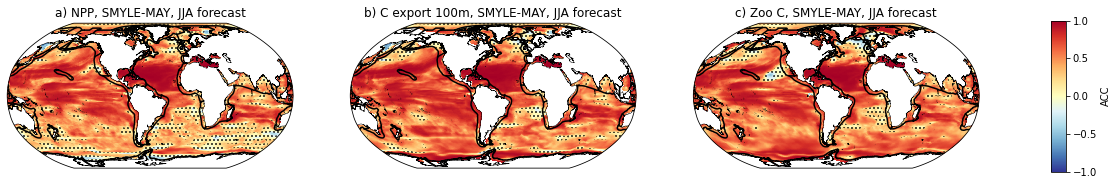

In [8]:
fig = plt.figure(figsize=(20,3))

sf = shp.Reader("/glade/work/kristenk/fish-offline/fish-offline/notebooks/data/LMEs66_Offshore")

hatchlevs = [0,0.1,100]

################################################################################ NPP
ax = fig.add_subplot(1,3,1, projection=ccrs.Robinson(central_longitude=305.0))

#### May initialization, JJA
ax.set_title('a) NPP, SMYLE-MAY, JJA forecast', fontsize=12)

lon,lat,field = maps.adjust_pop_grid(ds_smyle05_NPP.lon,ds_smyle05_NPP.lat,ds_smyle05_NPP.corr.isel(L=0))
pc = ax.pcolormesh(lon,lat,field,
                transform=ccrs.PlateCarree(),
                cmap='RdYlBu_r',vmin=-1,vmax=1)

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon, ds_smyle05_NPP.lat,ds_smyle05_NPP.pval.isel(L=0))
ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
             hatches=[None,'...', '...'], 
             alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

################################################################################ C export

ax = fig.add_subplot(1,3,2, projection=ccrs.Robinson(central_longitude=305.0))

#### May initialization, JJA
ax.set_title('b) C export 100m, SMYLE-MAY, JJA forecast', fontsize=12)

lon,lat,field = maps.adjust_pop_grid(ds_smyle05_Cexport.lon,ds_smyle05_Cexport.lat,ds_smyle05_Cexport.corr.isel(L=0))
pc = ax.pcolormesh(lon,lat,field,
                transform=ccrs.PlateCarree(),
                cmap='RdYlBu_r',vmin=-1,vmax=1)

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_Cexport.lon, ds_smyle05_Cexport.lat,ds_smyle05_Cexport.pval.isel(L=0))
ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
             hatches=[None,'...', '...'], 
             alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

################################################################################ zooC

ax = fig.add_subplot(1,3,3, projection=ccrs.Robinson(central_longitude=305.0))

#### May initialization, JJA
ax.set_title('c) Zoo C, SMYLE-MAY, JJA forecast', fontsize=12)

lon,lat,field = maps.adjust_pop_grid(ds_smyle05_zooC.lon,ds_smyle05_zooC.lat,ds_smyle05_zooC.corr.isel(L=0))
pc = ax.pcolormesh(lon,lat,field,
                transform=ccrs.PlateCarree(),
                cmap='RdYlBu_r',vmin=-1,vmax=1)

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_zooC.lon, ds_smyle05_zooC.lat,ds_smyle05_zooC.pval.isel(L=0))
ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
             hatches=[None,'...', '...'], 
             alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(pc, cax=cbar_ax, label='ACC');

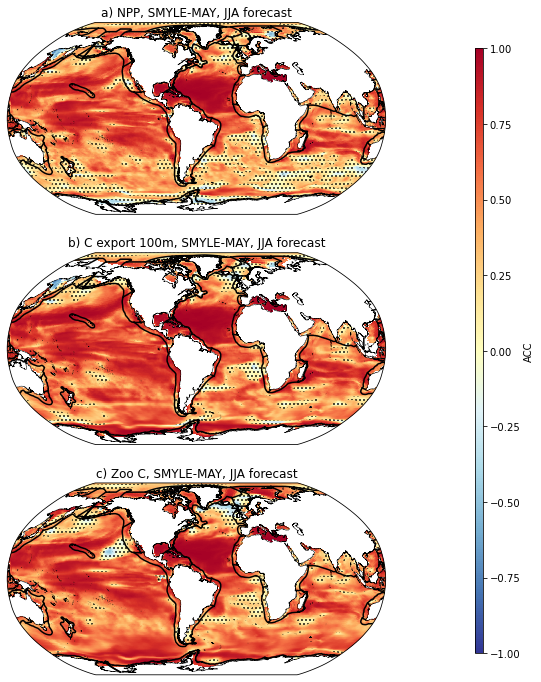

In [9]:
fig = plt.figure(figsize=(10,12))

sf = shp.Reader("/glade/work/kristenk/fish-offline/fish-offline/notebooks/data/LMEs66_Offshore")

hatchlevs = [0,0.1,100]

################################################################################ NPP
ax = fig.add_subplot(3,1,1, projection=ccrs.Robinson(central_longitude=305.0))

#### May initialization, JJA
ax.set_title('a) NPP, SMYLE-MAY, JJA forecast', fontsize=12)

lon,lat,field = maps.adjust_pop_grid(ds_smyle05_NPP.lon,ds_smyle05_NPP.lat,ds_smyle05_NPP.corr.isel(L=0))
pc = ax.pcolormesh(lon,lat,field,
                transform=ccrs.PlateCarree(),
                cmap='RdYlBu_r',vmin=-1,vmax=1)

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon, ds_smyle05_NPP.lat,ds_smyle05_NPP.pval.isel(L=0))
ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
             hatches=[None,'...', '...'], 
             alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

################################################################################ C export

ax = fig.add_subplot(3,1,2, projection=ccrs.Robinson(central_longitude=305.0))

#### May initialization, JJA
ax.set_title('b) C export 100m, SMYLE-MAY, JJA forecast', fontsize=12)

lon,lat,field = maps.adjust_pop_grid(ds_smyle05_Cexport.lon,ds_smyle05_Cexport.lat,ds_smyle05_Cexport.corr.isel(L=0))
pc = ax.pcolormesh(lon,lat,field,
                transform=ccrs.PlateCarree(),
                cmap='RdYlBu_r',vmin=-1,vmax=1)

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_Cexport.lon, ds_smyle05_Cexport.lat,ds_smyle05_Cexport.pval.isel(L=0))
ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
             hatches=[None,'...', '...'], 
             alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

################################################################################ zooC

ax = fig.add_subplot(3,1,3, projection=ccrs.Robinson(central_longitude=305.0))

#### May initialization, JJA
ax.set_title('c) Zoo C, SMYLE-MAY, JJA forecast', fontsize=12)

lon,lat,field = maps.adjust_pop_grid(ds_smyle05_zooC.lon,ds_smyle05_zooC.lat,ds_smyle05_zooC.corr.isel(L=0))
pc = ax.pcolormesh(lon,lat,field,
                transform=ccrs.PlateCarree(),
                cmap='RdYlBu_r',vmin=-1,vmax=1)

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_zooC.lon, ds_smyle05_zooC.lat,ds_smyle05_zooC.pval.isel(L=0))
ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
             hatches=[None,'...', '...'], 
             alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(pc, cax=cbar_ax, label='ACC');

### line plots for 2 LMEs

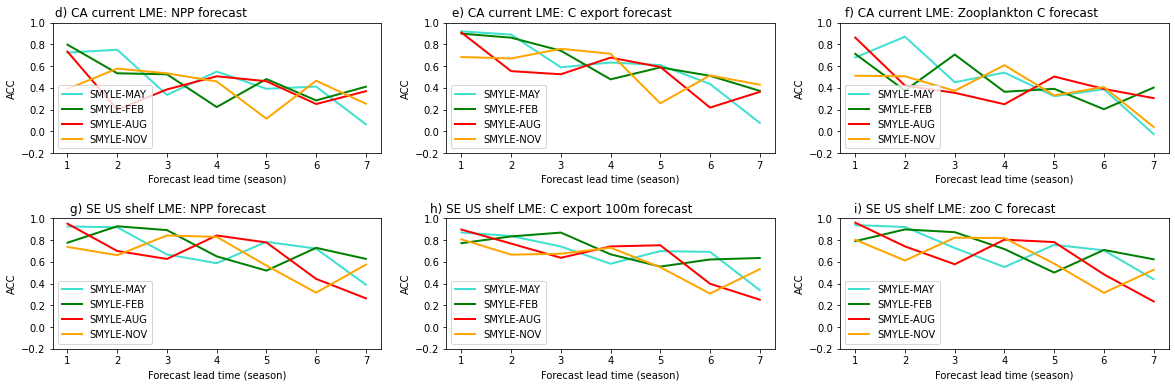

In [10]:
fig = plt.figure(figsize=(20,6))

xvals = np.arange(1,8,1)
#xlabs = ['JJA','SON','DJF','MAM','JJA','SON','DJF']

ax = fig.add_subplot(2,3,1)
ax.set_title('d) CA current LME: NPP forecast',fontsize=12,x=0.3)
ax.set_ylabel('ACC')
ax.set_xlabel('Forecast lead time (season)')
ax.set_ylim(-0.2,1)
ax.plot(xvals,ds_smyle05_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='turquoise', label='SMYLE-MAY', lw=2)
ax.plot(xvals,ds_smyle02_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='green', label='SMYLE-FEB', lw=2)
ax.plot(xvals,ds_smyle08_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='red', label='SMYLE-AUG', lw=2)
ax.plot(xvals,ds_smyle11_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='orange', label='SMYLE-NOV', lw=2)
#plt.xticks(xvals, xlabs, rotation='vertical')
ax.legend();


ax = fig.add_subplot(2,3,2)
ax.set_title('e) CA current LME: C export forecast',fontsize=12,x=0.35)
ax.set_ylabel('ACC')
ax.set_xlabel('Forecast lead time (season)')
ax.set_ylim(-0.2,1)
ax.plot(xvals,ds_smyle05_Cexport_lme3.corr.isel(L=slice(0,7)), 
         color='turquoise', label='SMYLE-MAY', lw=2)
ax.plot(xvals,ds_smyle02_Cexport_lme3.corr.isel(L=slice(0,7)), 
         color='green', label='SMYLE-FEB', lw=2)
ax.plot(xvals,ds_smyle08_Cexport_lme3.corr.isel(L=slice(0,7)), 
         color='red', label='SMYLE-AUG', lw=2)
ax.plot(xvals,ds_smyle11_Cexport_lme3.corr.isel(L=slice(0,7)), 
         color='orange', label='SMYLE-NOV', lw=2)
#plt.xticks(xvals, xlabs, rotation='vertical')
ax.legend();


ax = fig.add_subplot(2,3,3)
ax.set_title('f) CA current LME: Zooplankton C forecast',fontsize=12,x=0.4)
ax.set_ylabel('ACC')
ax.set_xlabel('Forecast lead time (season)')
ax.set_ylim(-0.2,1)
ax.plot(xvals,ds_smyle05_zooC_lme3.corr.isel(L=slice(0,7)), 
         color='turquoise', label='SMYLE-MAY', lw=2)
ax.plot(xvals,ds_smyle02_zooC_lme3.corr.isel(L=slice(0,7)), 
         color='green', label='SMYLE-FEB', lw=2)
ax.plot(xvals,ds_smyle08_zooC_lme3.corr.isel(L=slice(0,7)), 
         color='red', label='SMYLE-AUG', lw=2)
ax.plot(xvals,ds_smyle11_zooC_lme3.corr.isel(L=slice(0,7)), 
         color='orange', label='SMYLE-NOV', lw=2)
#plt.xticks(xvals, xlabs, rotation='vertical')
ax.legend();


ax = fig.add_subplot(2,3,4)
ax.set_title('g) SE US shelf LME: NPP forecast',fontsize=12,x=0.35)
ax.set_ylabel('ACC')
ax.set_xlabel('Forecast lead time (season)')
ax.set_ylim(-0.2,1)
ax.plot(xvals,ds_smyle05_NPP_lme6.corr.isel(L=slice(0,7)), 
         color='turquoise', label='SMYLE-MAY', lw=2)
ax.plot(xvals,ds_smyle02_NPP_lme6.corr.isel(L=slice(0,7)), 
         color='green', label='SMYLE-FEB', lw=2)
ax.plot(xvals,ds_smyle08_NPP_lme6.corr.isel(L=slice(0,7)), 
         color='red', label='SMYLE-AUG', lw=2)
ax.plot(xvals,ds_smyle11_NPP_lme6.corr.isel(L=slice(0,7)), 
         color='orange', label='SMYLE-NOV', lw=2)
#plt.xticks(xvals, xlabs, rotation='vertical')
ax.legend();

ax = fig.add_subplot(2,3,5)
ax.set_title('h) SE US shelf LME: C export 100m forecast',fontsize=12,x=0.35)
ax.set_ylabel('ACC')
ax.set_xlabel('Forecast lead time (season)')
ax.set_ylim(-0.2,1)
ax.plot(xvals,ds_smyle05_Cexport_lme6.corr.isel(L=slice(0,7)), 
         color='turquoise', label='SMYLE-MAY', lw=2)
ax.plot(xvals,ds_smyle02_Cexport_lme6.corr.isel(L=slice(0,7)), 
         color='green', label='SMYLE-FEB', lw=2)
ax.plot(xvals,ds_smyle08_Cexport_lme6.corr.isel(L=slice(0,7)), 
         color='red', label='SMYLE-AUG', lw=2)
ax.plot(xvals,ds_smyle11_Cexport_lme6.corr.isel(L=slice(0,7)), 
         color='orange', label='SMYLE-NOV', lw=2)
#plt.xticks(xvals, xlabs, rotation='vertical')
ax.legend();

ax = fig.add_subplot(2,3,6)
ax.set_title('i) SE US shelf LME: zoo C forecast',fontsize=12,x=0.35)
ax.set_ylabel('ACC')
ax.set_xlabel('Forecast lead time (season)')
ax.set_ylim(-0.2,1)
ax.plot(xvals,ds_smyle05_zooC_lme6.corr.isel(L=slice(0,7)), 
         color='turquoise', label='SMYLE-MAY', lw=2)
ax.plot(xvals,ds_smyle02_zooC_lme6.corr.isel(L=slice(0,7)), 
         color='green', label='SMYLE-FEB', lw=2)
ax.plot(xvals,ds_smyle08_zooC_lme6.corr.isel(L=slice(0,7)), 
         color='red', label='SMYLE-AUG', lw=2)
ax.plot(xvals,ds_smyle11_zooC_lme6.corr.isel(L=slice(0,7)), 
         color='orange', label='SMYLE-NOV', lw=2)
#plt.xticks(xvals, xlabs, rotation='vertical')
ax.legend();

fig.subplots_adjust(hspace=0.5)

### Put it all together

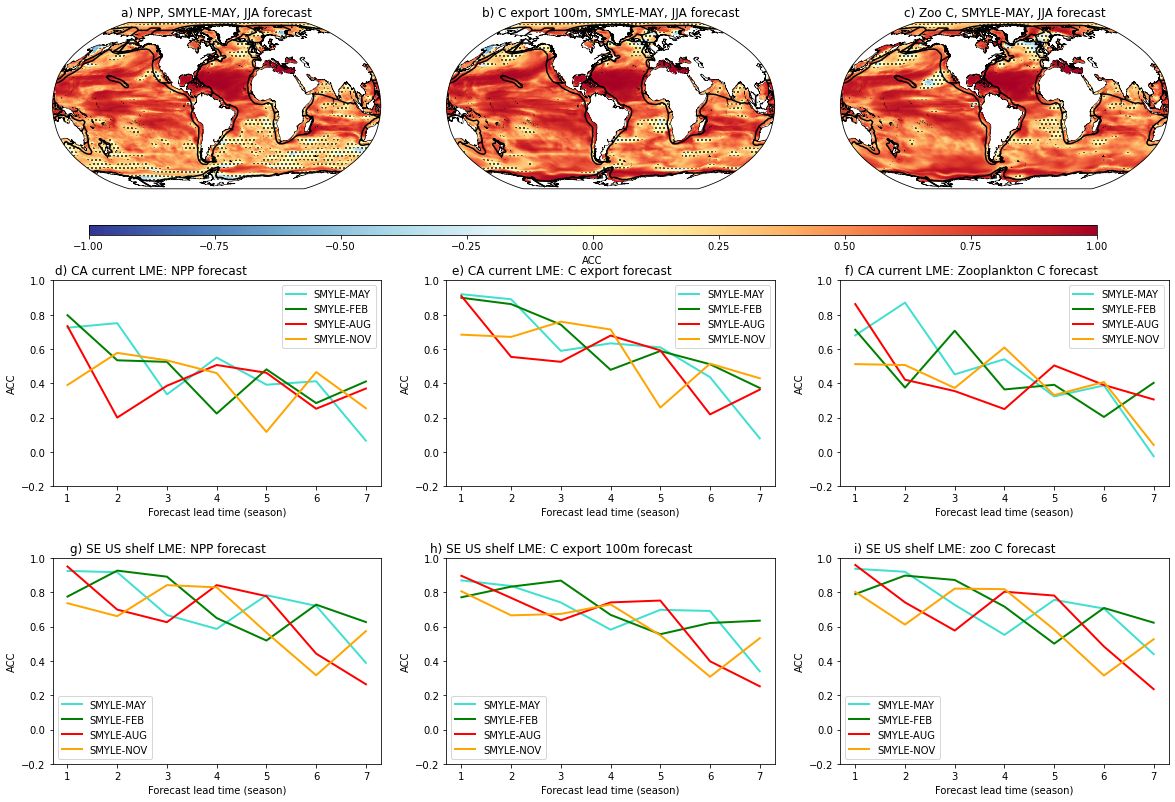

In [11]:
fig = plt.figure(figsize=(20,14))

sf = shp.Reader("/glade/work/kristenk/fish-offline/fish-offline/notebooks/data/LMEs66_Offshore")

hatchlevs = [0,0.1,100]

################################################################################ NPP
ax = fig.add_subplot(3,3,1, projection=ccrs.Robinson(central_longitude=305.0))

#### May initialization, JJA
ax.set_title('a) NPP, SMYLE-MAY, JJA forecast', fontsize=12)

lon,lat,field = maps.adjust_pop_grid(ds_smyle05_NPP.lon,ds_smyle05_NPP.lat,ds_smyle05_NPP.corr.isel(L=0))
pc = ax.pcolormesh(lon,lat,field,
                transform=ccrs.PlateCarree(),
                cmap='RdYlBu_r',vmin=-1,vmax=1)

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon, ds_smyle05_NPP.lat,ds_smyle05_NPP.pval.isel(L=0))
ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
             hatches=[None,'...', '...'], 
             alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

################################################################################ C export

ax = fig.add_subplot(3,3,2, projection=ccrs.Robinson(central_longitude=305.0))

#### May initialization, JJA
ax.set_title('b) C export 100m, SMYLE-MAY, JJA forecast', fontsize=12)

lon,lat,field = maps.adjust_pop_grid(ds_smyle05_Cexport.lon,ds_smyle05_Cexport.lat,ds_smyle05_Cexport.corr.isel(L=0))
pc = ax.pcolormesh(lon,lat,field,
                transform=ccrs.PlateCarree(),
                cmap='RdYlBu_r',vmin=-1,vmax=1)

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_Cexport.lon, ds_smyle05_Cexport.lat,ds_smyle05_Cexport.pval.isel(L=0))
ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
             hatches=[None,'...', '...'], 
             alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

################################################################################ zooC

ax = fig.add_subplot(3,3,3, projection=ccrs.Robinson(central_longitude=305.0))

#### May initialization, JJA
ax.set_title('c) Zoo C, SMYLE-MAY, JJA forecast', fontsize=12)

lon,lat,field = maps.adjust_pop_grid(ds_smyle05_zooC.lon,ds_smyle05_zooC.lat,ds_smyle05_zooC.corr.isel(L=0))
pc = ax.pcolormesh(lon,lat,field,
                transform=ccrs.PlateCarree(),
                cmap='RdYlBu_r',vmin=-1,vmax=1)

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_zooC.lon, ds_smyle05_zooC.lat,ds_smyle05_zooC.pval.isel(L=0))
ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
             hatches=[None,'...', '...'], 
             alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

### color base
#fig.subplots_adjust(bottom=0.8)
cbar_ax = fig.add_axes([0.15, 0.65, 0.7, 0.01])
fig.colorbar(pc, cax=cbar_ax, label='ACC',orientation='horizontal');

#########################################################################################

xvals = np.arange(1,8,1)
#xlabs = ['JJA','SON','DJF','MAM','JJA','SON','DJF']

ax = fig.add_subplot(3,3,4)
ax.set_title('d) CA current LME: NPP forecast',fontsize=12,x=0.3)
ax.set_ylabel('ACC')
ax.set_xlabel('Forecast lead time (season)')
ax.set_ylim(-0.2,1)
ax.plot(xvals,ds_smyle05_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='turquoise', label='SMYLE-MAY', lw=2)
ax.plot(xvals,ds_smyle02_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='green', label='SMYLE-FEB', lw=2)
ax.plot(xvals,ds_smyle08_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='red', label='SMYLE-AUG', lw=2)
ax.plot(xvals,ds_smyle11_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='orange', label='SMYLE-NOV', lw=2)
#plt.xticks(xvals, xlabs, rotation='vertical')
ax.legend();


ax = fig.add_subplot(3,3,5)
ax.set_title('e) CA current LME: C export forecast',fontsize=12,x=0.35)
ax.set_ylabel('ACC')
ax.set_xlabel('Forecast lead time (season)')
ax.set_ylim(-0.2,1)
ax.plot(xvals,ds_smyle05_Cexport_lme3.corr.isel(L=slice(0,7)), 
         color='turquoise', label='SMYLE-MAY', lw=2)
ax.plot(xvals,ds_smyle02_Cexport_lme3.corr.isel(L=slice(0,7)), 
         color='green', label='SMYLE-FEB', lw=2)
ax.plot(xvals,ds_smyle08_Cexport_lme3.corr.isel(L=slice(0,7)), 
         color='red', label='SMYLE-AUG', lw=2)
ax.plot(xvals,ds_smyle11_Cexport_lme3.corr.isel(L=slice(0,7)), 
         color='orange', label='SMYLE-NOV', lw=2)
#plt.xticks(xvals, xlabs, rotation='vertical')
ax.legend();


ax = fig.add_subplot(3,3,6)
ax.set_title('f) CA current LME: Zooplankton C forecast',fontsize=12,x=0.4)
ax.set_ylabel('ACC')
ax.set_xlabel('Forecast lead time (season)')
ax.set_ylim(-0.2,1)
ax.plot(xvals,ds_smyle05_zooC_lme3.corr.isel(L=slice(0,7)), 
         color='turquoise', label='SMYLE-MAY', lw=2)
ax.plot(xvals,ds_smyle02_zooC_lme3.corr.isel(L=slice(0,7)), 
         color='green', label='SMYLE-FEB', lw=2)
ax.plot(xvals,ds_smyle08_zooC_lme3.corr.isel(L=slice(0,7)), 
         color='red', label='SMYLE-AUG', lw=2)
ax.plot(xvals,ds_smyle11_zooC_lme3.corr.isel(L=slice(0,7)), 
         color='orange', label='SMYLE-NOV', lw=2)
#plt.xticks(xvals, xlabs, rotation='vertical')
ax.legend();


ax = fig.add_subplot(3,3,7)
ax.set_title('g) SE US shelf LME: NPP forecast',fontsize=12,x=0.35)
ax.set_ylabel('ACC')
ax.set_xlabel('Forecast lead time (season)')
ax.set_ylim(-0.2,1)
ax.plot(xvals,ds_smyle05_NPP_lme6.corr.isel(L=slice(0,7)), 
         color='turquoise', label='SMYLE-MAY', lw=2)
ax.plot(xvals,ds_smyle02_NPP_lme6.corr.isel(L=slice(0,7)), 
         color='green', label='SMYLE-FEB', lw=2)
ax.plot(xvals,ds_smyle08_NPP_lme6.corr.isel(L=slice(0,7)), 
         color='red', label='SMYLE-AUG', lw=2)
ax.plot(xvals,ds_smyle11_NPP_lme6.corr.isel(L=slice(0,7)), 
         color='orange', label='SMYLE-NOV', lw=2)
#plt.xticks(xvals, xlabs, rotation='vertical')
ax.legend();

ax = fig.add_subplot(3,3,8)
ax.set_title('h) SE US shelf LME: C export 100m forecast',fontsize=12,x=0.35)
ax.set_ylabel('ACC')
ax.set_xlabel('Forecast lead time (season)')
ax.set_ylim(-0.2,1)
ax.plot(xvals,ds_smyle05_Cexport_lme6.corr.isel(L=slice(0,7)), 
         color='turquoise', label='SMYLE-MAY', lw=2)
ax.plot(xvals,ds_smyle02_Cexport_lme6.corr.isel(L=slice(0,7)), 
         color='green', label='SMYLE-FEB', lw=2)
ax.plot(xvals,ds_smyle08_Cexport_lme6.corr.isel(L=slice(0,7)), 
         color='red', label='SMYLE-AUG', lw=2)
ax.plot(xvals,ds_smyle11_Cexport_lme6.corr.isel(L=slice(0,7)), 
         color='orange', label='SMYLE-NOV', lw=2)
#plt.xticks(xvals, xlabs, rotation='vertical')
ax.legend();

ax = fig.add_subplot(3,3,9)
ax.set_title('i) SE US shelf LME: zoo C forecast',fontsize=12,x=0.35)
ax.set_ylabel('ACC')
ax.set_xlabel('Forecast lead time (season)')
ax.set_ylim(-0.2,1)
ax.plot(xvals,ds_smyle05_zooC_lme6.corr.isel(L=slice(0,7)), 
         color='turquoise', label='SMYLE-MAY', lw=2)
ax.plot(xvals,ds_smyle02_zooC_lme6.corr.isel(L=slice(0,7)), 
         color='green', label='SMYLE-FEB', lw=2)
ax.plot(xvals,ds_smyle08_zooC_lme6.corr.isel(L=slice(0,7)), 
         color='red', label='SMYLE-AUG', lw=2)
ax.plot(xvals,ds_smyle11_zooC_lme6.corr.isel(L=slice(0,7)), 
         color='orange', label='SMYLE-NOV', lw=2)
#plt.xticks(xvals, xlabs, rotation='vertical')
ax.legend();

fig.subplots_adjust(hspace=0.35)

In [12]:
from SMYLEutils import colormap_utils as mycolors

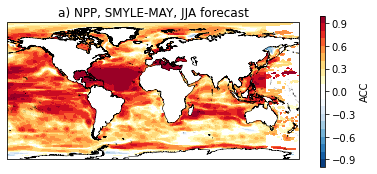

In [13]:
fig = plt.figure(figsize=(6,3))

sf = shp.Reader("/glade/work/kristenk/fish-offline/fish-offline/notebooks/data/LMEs66_Offshore")

hatchlevs = [0,0.1,100]
ci = 0.1
cmin = -1.
cmax = 1.
proj = ccrs.PlateCarree()
nlevs = (cmax-cmin)/ci + 1
mymap = mycolors.blue2red_cmap(nlevs)
clevs = np.arange(cmin, cmax+ci, ci)
extend='neither'
################################################################################ NPP
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

#### May initialization, JJA
ax.set_title('a) NPP, SMYLE-MAY, JJA forecast', fontsize=12)

lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon,ds_smyle05_NPP.lat,ds_smyle05_NPP.corr.isel(L=0))
cntr = ax.contourf(lon, lat, dat,levels=clevs, cmap = mymap, extend=extend) #,transform=ccrs.PlateCarree())

# for shape in sf.shapeRecords():
#     x = [i[0] for i in shape.shape.points[:]]
#     y = [i[1] for i in shape.shape.points[:]]
#     ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
# lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon, ds_smyle05_NPP.lat,ds_smyle05_NPP.pval.isel(L=0))
# ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
#              hatches=[None,'...', '...'], 
#              alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(cntr, cax=cbar_ax, label='ACC');

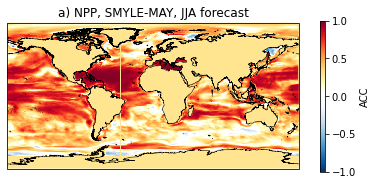

In [14]:
fig = plt.figure(figsize=(6,3))

sf = shp.Reader("/glade/work/kristenk/fish-offline/fish-offline/notebooks/data/LMEs66_Offshore")

hatchlevs = [0,0.1,100]
ci = 0.1
cmin = -1.
cmax = 1.
proj = ccrs.PlateCarree()
nlevs = (cmax-cmin)/ci + 1
mymap = mycolors.blue2red_cmap(nlevs)
clevs = np.arange(cmin, cmax+ci, ci)
extend='neither'
################################################################################ NPP
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

#### May initialization, JJA
ax.set_title('a) NPP, SMYLE-MAY, JJA forecast', fontsize=12)

#lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon,ds_smyle05_NPP.lat,ds_smyle05_NPP.corr.isel(L=0))
#cntr = ax.contourf(lon, lat, dat,levels=clevs, cmap = mymap, extend=extend)
cntr = ax.pcolormesh(ds_smyle05_NPP.lon,ds_smyle05_NPP.lat,ds_smyle05_NPP.corr.isel(L=0),vmin=-1, vmax=1, cmap = mymap)

# for shape in sf.shapeRecords():
#     x = [i[0] for i in shape.shape.points[:]]
#     y = [i[1] for i in shape.shape.points[:]]
#     ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
# lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon, ds_smyle05_NPP.lat,ds_smyle05_NPP.pval.isel(L=0))
# ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
#              hatches=[None,'...', '...'], 
#              alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(cntr, cax=cbar_ax, label='ACC');

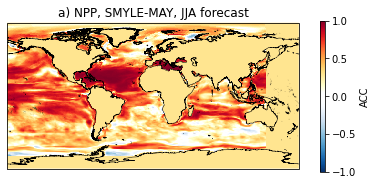

In [15]:
fig = plt.figure(figsize=(6,3))

sf = shp.Reader("/glade/work/kristenk/fish-offline/fish-offline/notebooks/data/LMEs66_Offshore")

hatchlevs = [0,0.1,100]
ci = 0.1
cmin = -1.
cmax = 1.
proj = ccrs.PlateCarree()
nlevs = (cmax-cmin)/ci + 1
mymap = mycolors.blue2red_cmap(nlevs)
clevs = np.arange(cmin, cmax+ci, ci)
extend='neither'
################################################################################ NPP
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

#### May initialization, JJA
ax.set_title('a) NPP, SMYLE-MAY, JJA forecast', fontsize=12)

lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon,ds_smyle05_NPP.lat,ds_smyle05_NPP.corr.isel(L=0))
#cntr = ax.contourf(lon, lat, dat,levels=clevs, cmap = mymap, extend=extend)
cntr = ax.pcolormesh(lon, lat, dat,vmin=-1, vmax=1, cmap = mymap,transform=ccrs.PlateCarree())

# for shape in sf.shapeRecords():
#     x = [i[0] for i in shape.shape.points[:]]
#     y = [i[1] for i in shape.shape.points[:]]
#     ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
# lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon, ds_smyle05_NPP.lat,ds_smyle05_NPP.pval.isel(L=0))
# ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
#              hatches=[None,'...', '...'], 
#              alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(cntr, cax=cbar_ax, label='ACC');

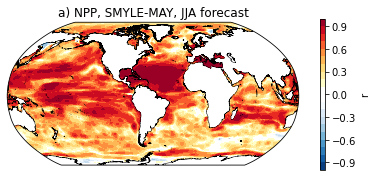

In [16]:
fig = plt.figure(figsize=(6,3))

sf = shp.Reader("/glade/work/kristenk/fish-offline/fish-offline/notebooks/data/LMEs66_Offshore")

hatchlevs = [0,0.1,100]
ci = 0.1
cmin = -1.
cmax = 1.
proj = ccrs.PlateCarree()
nlevs = (cmax-cmin)/ci + 1
mymap = mycolors.blue2red_cmap(nlevs)
clevs = np.arange(cmin, cmax+ci, ci)
extend='neither'
################################################################################ NPP
#ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree()) #projection=ccrs.Robinson(central_longitude=305.0))
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=305.0))

#### May initialization, JJA
ax.set_title('a) NPP, SMYLE-MAY, JJA forecast', fontsize=12)

lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon,ds_smyle05_NPP.lat,ds_smyle05_NPP.corr.isel(L=0))
cntr = ax.contourf(lon, lat, dat,levels=clevs, cmap = mymap, extend=extend,transform=ccrs.PlateCarree())

# for shape in sf.shapeRecords():
#     x = [i[0] for i in shape.shape.points[:]]
#     y = [i[1] for i in shape.shape.points[:]]
#     ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
# lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon, ds_smyle05_NPP.lat,ds_smyle05_NPP.pval.isel(L=0))
# ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
#              hatches=[None,'...', '...'], 
#              alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(cntr, cax=cbar_ax, label='r');

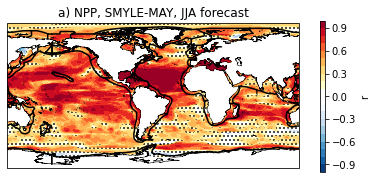

In [17]:
fig = plt.figure(figsize=(6,3))

sf = shp.Reader("/glade/work/kristenk/fish-offline/fish-offline/notebooks/data/LMEs66_Offshore")

hatchlevs = [0,0.1,100]
ci = 0.1
cmin = -1.
cmax = 1.
proj = ccrs.PlateCarree()
nlevs = (cmax-cmin)/ci + 1
mymap = mycolors.blue2red_cmap(nlevs)
clevs = np.arange(cmin, cmax+ci, ci)
extend='neither'
################################################################################ NPP
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=305.0)) #projection=ccrs.Robinson(central_longitude=305.0))
#ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=305.0))

#### May initialization, JJA
ax.set_title('a) NPP, SMYLE-MAY, JJA forecast', fontsize=12)

lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon,ds_smyle05_NPP.lat,ds_smyle05_NPP.corr.isel(L=0))
cntr = ax.contourf(lon, lat, dat,levels=clevs, cmap = mymap, extend=extend,transform=ccrs.PlateCarree())

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon, ds_smyle05_NPP.lat,ds_smyle05_NPP.pval.isel(L=0))
ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
             hatches=[None,'...', '...'], 
             alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

### color base
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(cntr, cax=cbar_ax, label='r');

In [18]:
ds_smyle05_NPP_lme3.corr.where(ds_smyle05_NPP_lme3.pval<0.1)

<xarray.DataArray 'corr' (L: 8)>
array([0.72406749, 0.75095654, 0.3351931 , 0.54985711, 0.39162214,
       0.41183889,        nan,        nan])
Coordinates:
  * L        (L) int64 1 2 3 4 5 6 7 8
    season   (L) object 'JJA' 'SON' 'DJF' 'MAM' 'JJA' 'SON' 'DJF' 'MAM'

In [19]:
ds_smyle11_NPP_lme3.L

<xarray.DataArray 'L' (L: 8)>
array([1, 2, 3, 4, 5, 6, 7, 8])
Coordinates:
  * L        (L) int64 1 2 3 4 5 6 7 8
    season   (L) object ...

([<matplotlib.axis.XTick at 0x2b96be455280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

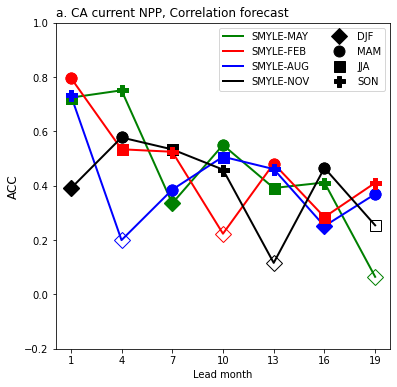

In [22]:
seasons = ['DJF','MAM','JJA','SON']
markers = ['D','o','s','P']
colors = ['k','r','g','b']

leadmon = [1,4,7,10,13,16,19]
fig = plt.figure(figsize=(6,6))

xvals = np.arange(1,8,1)
#xlabs = ['JJA','SON','DJF','MAM','JJA','SON','DJF']

ax = fig.add_subplot(1,1,1)
ax.set_title('a. CA current NPP, Correlation forecast',fontsize=12,loc='left')
ax.set_ylabel('ACC', fontsize=12)
ax.set_xlabel('Lead month')
ax.set_ylim(-0.2,1)
ax.plot(leadmon,ds_smyle05_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='g', label='SMYLE-MAY', lw=2)
ax.plot(leadmon,ds_smyle02_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='r', label='SMYLE-FEB', lw=2)
ax.plot(leadmon,ds_smyle08_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='b', label='SMYLE-AUG', lw=2)
ax.plot(leadmon,ds_smyle11_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='k', label='SMYLE-NOV', lw=2)

for i,j in zip(seasons,markers):
    ax.plot(leadmon,ds_smyle11_NPP_lme3.corr.where(ds_smyle11_NPP_lme3.season==i).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle11_NPP_lme3.corr.where(ds_smyle11_NPP_lme3.season==i).where(ds_smyle11_NPP_lme3.pval<0.1).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,label=i,linestyle='None')
    ax.plot(leadmon,ds_smyle02_NPP_lme3.corr.where(ds_smyle02_NPP_lme3.season==i).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle02_NPP_lme3.corr.where(ds_smyle02_NPP_lme3.season==i).where(ds_smyle02_NPP_lme3.pval<0.1).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle05_NPP_lme3.corr.where(ds_smyle05_NPP_lme3.season==i).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle05_NPP_lme3.corr.where(ds_smyle05_NPP_lme3.season==i).where(ds_smyle05_NPP_lme3.pval<0.1).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle08_NPP_lme3.corr.where(ds_smyle08_NPP_lme3.season==i).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle08_NPP_lme3.corr.where(ds_smyle08_NPP_lme3.season==i).where(ds_smyle08_NPP_lme3.pval<0.1).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11)
leg1 = ax.legend(loc='upper right',ncol=2)


plt.xticks([1,4,7,10,13,16,19]);


CPU times: user 1min 32s, sys: 3.89 s, total: 1min 36s
Wall time: 1min 38s


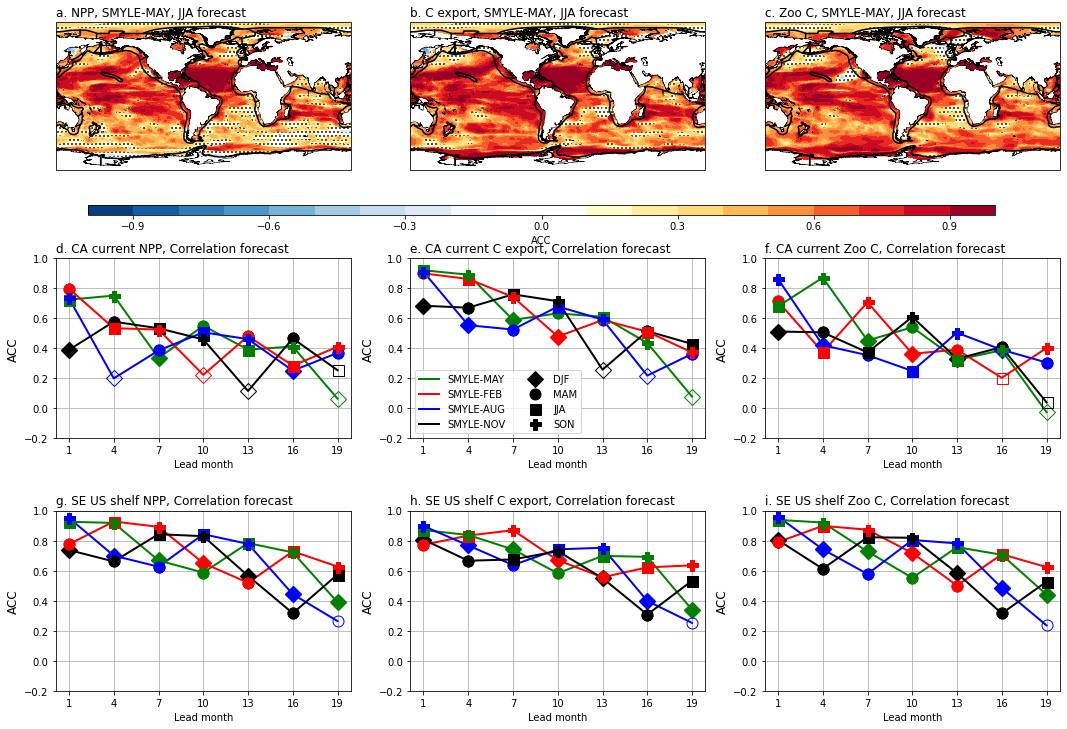

In [24]:
%%time

fig = plt.figure(figsize=(18,12.6))

sf = shp.Reader("/glade/work/kristenk/fish-offline/fish-offline/notebooks/data/LMEs66_Offshore")

hatchlevs = [0,0.1,100]
ci = 0.1
cmin = -1.
cmax = 1.
proj = ccrs.PlateCarree()
nlevs = (cmax-cmin)/ci + 1
mymap = mycolors.blue2red_cmap(nlevs)
clevs = np.arange(cmin, cmax+ci, ci)
extend='neither'
################################################################################ NPP map
ax = fig.add_subplot(3,3,1,projection=ccrs.PlateCarree(central_longitude=305.0))

#### May initialization, JJA
ax.set_title('a. NPP, SMYLE-MAY, JJA forecast', fontsize=12, loc='left')

lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon,ds_smyle05_NPP.lat,ds_smyle05_NPP.corr.isel(L=0))
cntr = ax.contourf(lon, lat, dat,levels=clevs, cmap = mymap, extend=extend,transform=ccrs.PlateCarree())

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_NPP.lon, ds_smyle05_NPP.lat,ds_smyle05_NPP.pval.isel(L=0))
ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
             hatches=[None,'...', '...'], 
             alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

################################################################################ C export map
ax = fig.add_subplot(3,3,2,projection=ccrs.PlateCarree(central_longitude=305.0)) 

#### May initialization, JJA
ax.set_title('b. C export, SMYLE-MAY, JJA forecast', fontsize=12, loc='left')

lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_Cexport.lon,ds_smyle05_Cexport.lat,ds_smyle05_Cexport.corr.isel(L=0))
cntr = ax.contourf(lon, lat, dat,levels=clevs, cmap = mymap, extend=extend,transform=ccrs.PlateCarree())

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_Cexport.lon, ds_smyle05_Cexport.lat,ds_smyle05_Cexport.pval.isel(L=0))
ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
             hatches=[None,'...', '...'], 
             alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);

################################################################################ C export map
ax = fig.add_subplot(3,3,3,projection=ccrs.PlateCarree(central_longitude=305.0)) 

#### May initialization, JJA
ax.set_title('c. Zoo C, SMYLE-MAY, JJA forecast', fontsize=12, loc='left')

lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_zooC.lon,ds_smyle05_zooC.lat,ds_smyle05_zooC.corr.isel(L=0))
cntr = ax.contourf(lon, lat, dat,levels=clevs, cmap = mymap, extend=extend,transform=ccrs.PlateCarree())

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    ax.plot(x,y,transform=ccrs.PlateCarree(),color='k')
    
lon, lat, dat = maps.adjust_pop_grid(ds_smyle05_zooC.lon, ds_smyle05_zooC.lat,ds_smyle05_zooC.pval.isel(L=0))
ax.contourf(lon, lat, dat, colors='none',levels=hatchlevs, 
             hatches=[None,'...', '...'], 
             alpha=0., transform=ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5);


### color base
#fig.subplots_adjust(bottom=0.8)
cbar_ax = fig.add_axes([0.15, 0.65, 0.7, 0.01])
fig.colorbar(cntr, cax=cbar_ax, label='ACC',orientation='horizontal');



##################################################################
##################################################################


seasons = ['DJF','MAM','JJA','SON']
markers = ['D','o','s','P']
colors = ['k','r','g','b']
leadmon = [1,4,7,10,13,16,19]

ax = fig.add_subplot(3,3,4)
ax.set_title('d. CA current NPP, Correlation forecast',fontsize=12,loc='left')
ax.set_ylabel('ACC', fontsize=12)
ax.set_xlabel('Lead month')
ax.set_ylim(-0.2,1)
ax.grid(True)
ax.plot(leadmon,ds_smyle05_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='g', label='SMYLE-MAY', lw=2)
ax.plot(leadmon,ds_smyle02_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='r', label='SMYLE-FEB', lw=2)
ax.plot(leadmon,ds_smyle08_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='b', label='SMYLE-AUG', lw=2)
ax.plot(leadmon,ds_smyle11_NPP_lme3.corr.isel(L=slice(0,7)), 
         color='k', label='SMYLE-NOV', lw=2)

for i,j in zip(seasons,markers):
    ax.plot(leadmon,ds_smyle11_NPP_lme3.corr.where(ds_smyle11_NPP_lme3.season==i).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle11_NPP_lme3.corr.where(ds_smyle11_NPP_lme3.season==i).where(ds_smyle11_NPP_lme3.pval<0.1).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,label=i,linestyle='None')
    ax.plot(leadmon,ds_smyle02_NPP_lme3.corr.where(ds_smyle02_NPP_lme3.season==i).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle02_NPP_lme3.corr.where(ds_smyle02_NPP_lme3.season==i).where(ds_smyle02_NPP_lme3.pval<0.1).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle05_NPP_lme3.corr.where(ds_smyle05_NPP_lme3.season==i).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle05_NPP_lme3.corr.where(ds_smyle05_NPP_lme3.season==i).where(ds_smyle05_NPP_lme3.pval<0.1).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle08_NPP_lme3.corr.where(ds_smyle08_NPP_lme3.season==i).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle08_NPP_lme3.corr.where(ds_smyle08_NPP_lme3.season==i).where(ds_smyle08_NPP_lme3.pval<0.1).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11)

plt.xticks([1,4,7,10,13,16,19])

ax = fig.add_subplot(3,3,5)
ax.set_title('e. CA current C export, Correlation forecast',fontsize=12,loc='left')
ax.set_ylabel('ACC', fontsize=12)
ax.set_xlabel('Lead month')
ax.set_ylim(-0.2,1)
ax.grid(True)
ax.plot(leadmon,ds_smyle05_Cexport_lme3.corr.isel(L=slice(0,7)), 
         color='g', label='SMYLE-MAY', lw=2)
ax.plot(leadmon,ds_smyle02_Cexport_lme3.corr.isel(L=slice(0,7)), 
         color='r', label='SMYLE-FEB', lw=2)
ax.plot(leadmon,ds_smyle08_Cexport_lme3.corr.isel(L=slice(0,7)), 
         color='b', label='SMYLE-AUG', lw=2)
ax.plot(leadmon,ds_smyle11_Cexport_lme3.corr.isel(L=slice(0,7)), 
         color='k', label='SMYLE-NOV', lw=2)

for i,j in zip(seasons,markers):
    ax.plot(leadmon,ds_smyle11_Cexport_lme3.corr.where(ds_smyle11_Cexport_lme3.season==i).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle11_Cexport_lme3.corr.where(ds_smyle11_Cexport_lme3.season==i).where(ds_smyle11_Cexport_lme3.pval<0.1).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,label=i,linestyle='None')
    ax.plot(leadmon,ds_smyle02_Cexport_lme3.corr.where(ds_smyle02_Cexport_lme3.season==i).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle02_Cexport_lme3.corr.where(ds_smyle02_Cexport_lme3.season==i).where(ds_smyle02_Cexport_lme3.pval<0.1).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle05_Cexport_lme3.corr.where(ds_smyle05_Cexport_lme3.season==i).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle05_Cexport_lme3.corr.where(ds_smyle05_Cexport_lme3.season==i).where(ds_smyle05_Cexport_lme3.pval<0.1).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle08_Cexport_lme3.corr.where(ds_smyle08_Cexport_lme3.season==i).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle08_Cexport_lme3.corr.where(ds_smyle08_Cexport_lme3.season==i).where(ds_smyle08_Cexport_lme3.pval<0.1).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11)
leg1 = ax.legend(loc='lower left',ncol=2)
plt.xticks([1,4,7,10,13,16,19])

ax = fig.add_subplot(3,3,6)
ax.set_title('f. CA current Zoo C, Correlation forecast',fontsize=12,loc='left')
ax.set_ylabel('ACC', fontsize=12)
ax.set_xlabel('Lead month')
ax.set_ylim(-0.2,1)
ax.grid(True)
ax.plot(leadmon,ds_smyle05_zooC_lme3.corr.isel(L=slice(0,7)), 
         color='g', label='SMYLE-MAY', lw=2)
ax.plot(leadmon,ds_smyle02_zooC_lme3.corr.isel(L=slice(0,7)), 
         color='r', label='SMYLE-FEB', lw=2)
ax.plot(leadmon,ds_smyle08_zooC_lme3.corr.isel(L=slice(0,7)), 
         color='b', label='SMYLE-AUG', lw=2)
ax.plot(leadmon,ds_smyle11_zooC_lme3.corr.isel(L=slice(0,7)), 
         color='k', label='SMYLE-NOV', lw=2)

for i,j in zip(seasons,markers):
    ax.plot(leadmon,ds_smyle11_zooC_lme3.corr.where(ds_smyle11_zooC_lme3.season==i).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle11_zooC_lme3.corr.where(ds_smyle11_zooC_lme3.season==i).where(ds_smyle11_zooC_lme3.pval<0.1).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,label=i,linestyle='None')
    ax.plot(leadmon,ds_smyle02_zooC_lme3.corr.where(ds_smyle02_zooC_lme3.season==i).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle02_zooC_lme3.corr.where(ds_smyle02_zooC_lme3.season==i).where(ds_smyle02_zooC_lme3.pval<0.1).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle05_zooC_lme3.corr.where(ds_smyle05_zooC_lme3.season==i).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle05_zooC_lme3.corr.where(ds_smyle05_zooC_lme3.season==i).where(ds_smyle05_zooC_lme3.pval<0.1).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle08_zooC_lme3.corr.where(ds_smyle08_zooC_lme3.season==i).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle08_zooC_lme3.corr.where(ds_smyle08_zooC_lme3.season==i).where(ds_smyle08_zooC_lme3.pval<0.1).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11)
#leg1 = ax.legend(loc='upper right',ncol=2)
plt.xticks([1,4,7,10,13,16,19])

############################################################### SE US shelf
ax = fig.add_subplot(3,3,7)
ax.set_title('g. SE US shelf NPP, Correlation forecast',fontsize=12,loc='left')
ax.set_ylabel('ACC', fontsize=12)
ax.set_xlabel('Lead month')
ax.set_ylim(-0.2,1)
ax.grid(True)
ax.plot(leadmon,ds_smyle05_NPP_lme6.corr.isel(L=slice(0,7)), 
         color='g', label='SMYLE-MAY', lw=2)
ax.plot(leadmon,ds_smyle02_NPP_lme6.corr.isel(L=slice(0,7)), 
         color='r', label='SMYLE-FEB', lw=2)
ax.plot(leadmon,ds_smyle08_NPP_lme6.corr.isel(L=slice(0,7)), 
         color='b', label='SMYLE-AUG', lw=2)
ax.plot(leadmon,ds_smyle11_NPP_lme6.corr.isel(L=slice(0,7)), 
         color='k', label='SMYLE-NOV', lw=2)

for i,j in zip(seasons,markers):
    ax.plot(leadmon,ds_smyle11_NPP_lme6.corr.where(ds_smyle11_NPP_lme6.season==i).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle11_NPP_lme6.corr.where(ds_smyle11_NPP_lme6.season==i).where(ds_smyle11_NPP_lme6.pval<0.1).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,label=i,linestyle='None')
    ax.plot(leadmon,ds_smyle02_NPP_lme6.corr.where(ds_smyle02_NPP_lme6.season==i).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle02_NPP_lme6.corr.where(ds_smyle02_NPP_lme6.season==i).where(ds_smyle02_NPP_lme6.pval<0.1).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle05_NPP_lme6.corr.where(ds_smyle05_NPP_lme6.season==i).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle05_NPP_lme6.corr.where(ds_smyle05_NPP_lme6.season==i).where(ds_smyle05_NPP_lme6.pval<0.1).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle08_NPP_lme6.corr.where(ds_smyle08_NPP_lme6.season==i).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle08_NPP_lme6.corr.where(ds_smyle08_NPP_lme6.season==i).where(ds_smyle08_NPP_lme6.pval<0.1).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11)
#leg1 = ax.legend(loc='upper right',ncol=2)
plt.xticks([1,4,7,10,13,16,19])


ax = fig.add_subplot(3,3,8)
ax.set_title('h. SE US shelf C export, Correlation forecast',fontsize=12,loc='left')
ax.set_ylabel('ACC', fontsize=12)
ax.set_xlabel('Lead month')
ax.set_ylim(-0.2,1)
ax.grid(True)
ax.plot(leadmon,ds_smyle05_Cexport_lme6.corr.isel(L=slice(0,7)), 
         color='g', label='SMYLE-MAY', lw=2)
ax.plot(leadmon,ds_smyle02_Cexport_lme6.corr.isel(L=slice(0,7)), 
         color='r', label='SMYLE-FEB', lw=2)
ax.plot(leadmon,ds_smyle08_Cexport_lme6.corr.isel(L=slice(0,7)), 
         color='b', label='SMYLE-AUG', lw=2)
ax.plot(leadmon,ds_smyle11_Cexport_lme6.corr.isel(L=slice(0,7)), 
         color='k', label='SMYLE-NOV', lw=2)

for i,j in zip(seasons,markers):
    ax.plot(leadmon,ds_smyle11_Cexport_lme6.corr.where(ds_smyle11_Cexport_lme6.season==i).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle11_Cexport_lme6.corr.where(ds_smyle11_Cexport_lme6.season==i).where(ds_smyle11_Cexport_lme6.pval<0.1).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,label=i,linestyle='None')
    ax.plot(leadmon,ds_smyle02_Cexport_lme6.corr.where(ds_smyle02_Cexport_lme6.season==i).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle02_Cexport_lme6.corr.where(ds_smyle02_Cexport_lme6.season==i).where(ds_smyle02_Cexport_lme6.pval<0.1).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle05_Cexport_lme6.corr.where(ds_smyle05_Cexport_lme6.season==i).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle05_Cexport_lme6.corr.where(ds_smyle05_Cexport_lme6.season==i).where(ds_smyle05_Cexport_lme6.pval<0.1).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle08_Cexport_lme6.corr.where(ds_smyle08_Cexport_lme6.season==i).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle08_Cexport_lme6.corr.where(ds_smyle08_Cexport_lme6.season==i).where(ds_smyle08_Cexport_lme6.pval<0.1).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11)
#leg1 = ax.legend(loc='upper right',ncol=2)
plt.xticks([1,4,7,10,13,16,19])

ax = fig.add_subplot(3,3,9)
ax.set_title('i. SE US shelf Zoo C, Correlation forecast',fontsize=12,loc='left')
ax.set_ylabel('ACC', fontsize=12)
ax.set_xlabel('Lead month')
ax.set_ylim(-0.2,1)
ax.grid(True)
ax.plot(leadmon,ds_smyle05_zooC_lme6.corr.isel(L=slice(0,7)), 
         color='g', label='SMYLE-MAY', lw=2)
ax.plot(leadmon,ds_smyle02_zooC_lme6.corr.isel(L=slice(0,7)), 
         color='r', label='SMYLE-FEB', lw=2)
ax.plot(leadmon,ds_smyle08_zooC_lme6.corr.isel(L=slice(0,7)), 
         color='b', label='SMYLE-AUG', lw=2)
ax.plot(leadmon,ds_smyle11_zooC_lme6.corr.isel(L=slice(0,7)), 
         color='k', label='SMYLE-NOV', lw=2)

for i,j in zip(seasons,markers):
    ax.plot(leadmon,ds_smyle11_zooC_lme6.corr.where(ds_smyle11_zooC_lme6.season==i).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle11_zooC_lme6.corr.where(ds_smyle11_zooC_lme6.season==i).where(ds_smyle11_zooC_lme6.pval<0.1).isel(L=slice(0,7)),
            color='k',marker=j,markersize=11,label=i,linestyle='None')
    ax.plot(leadmon,ds_smyle02_zooC_lme6.corr.where(ds_smyle02_zooC_lme6.season==i).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle02_zooC_lme6.corr.where(ds_smyle02_zooC_lme6.season==i).where(ds_smyle02_zooC_lme6.pval<0.1).isel(L=slice(0,7)),
            color='r',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle05_zooC_lme6.corr.where(ds_smyle05_zooC_lme6.season==i).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle05_zooC_lme6.corr.where(ds_smyle05_zooC_lme6.season==i).where(ds_smyle05_zooC_lme6.pval<0.1).isel(L=slice(0,7)),
            color='g',marker=j,markersize=11)
    ax.plot(leadmon,ds_smyle08_zooC_lme6.corr.where(ds_smyle08_zooC_lme6.season==i).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11,fillstyle='none')
    ax.plot(leadmon,ds_smyle08_zooC_lme6.corr.where(ds_smyle08_zooC_lme6.season==i).where(ds_smyle08_zooC_lme6.pval<0.1).isel(L=slice(0,7)),
            color='b',marker=j,markersize=11)
#leg1 = ax.legend(loc='upper right',ncol=2)
plt.xticks([1,4,7,10,13,16,19])

fig.subplots_adjust(hspace=0.4)